In [1]:
import seaborn as sns

In [336]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Create a visual showing the relationship between horsepower and fuel economy.

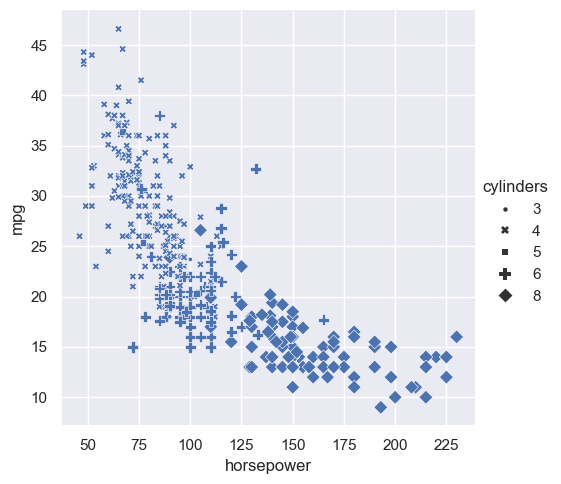

In [338]:
sns.set_theme(style="darkgrid")
sns.relplot(
    data=mpg,
    x="horsepower", y="mpg",
    style="cylinders",
    size="cylinders",sizes=(10, 100)
)

*Based on our data, we can see that cars with larger horserpower typically have poorer fuel economy than cars with lower horsepower.*

## Create a table summarizing fuel economy by country of origin.

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
summary = mpg.groupby(by='origin')['mpg'].agg(['mean', 'median', 'min', 'max']).reset_index()
summary.columns = ['Country of Origin', 'Average MPG', 'Median MPG', 'Min MPG', 'Max MPG']

In [154]:
print(summary)

  Country of Origin  Average MPG  Median MPG  Min MPG  Max MPG
0            europe    27.891429        26.5     16.2     44.3
1             japan    30.450633        31.6     18.0     46.6
2               usa    20.083534        18.5      9.0     39.0


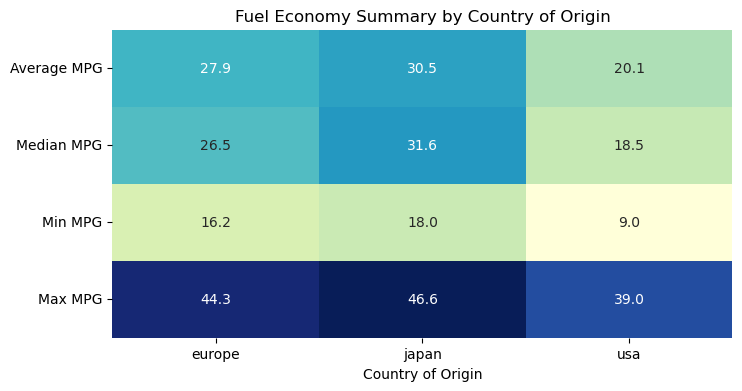

In [158]:
plt.figure(figsize=(8, 4))
sns.heatmap(summary.set_index('Country of Origin').T, annot=True, fmt=".1f", cmap="YlGnBu", cbar=False)
plt.title("Fuel Economy Summary by Country of Origin")
plt.show()

*We can see that Japan and Europe have the cars with the highest MPG and USA has the lowest MPG. However, all 3 countries are averaging between 20 and 30.5 MPG.*

## Create a visual showing how fuel economy has changed over time.

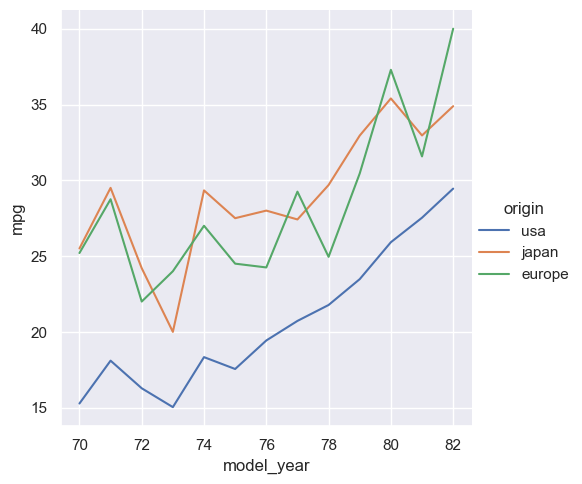

In [172]:
sns.set_theme(style="darkgrid")
sns.relplot(
    data=mpg, kind="line",
    x="model_year", y="mpg", hue="origin",errorbar=None,
)

*USA has had the most consistent growth in fuel economy through the years, although they still have lower MPG than Japan and Europe despite these 2 countries MPG fluctuating the most in time.*

## Create two other visuals or tables related to fuel economy.

In [182]:
mpg.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [264]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [310]:
mpg = mpg.dropna(subset=['mpg','cylinders'])

In [289]:
avg_cylinder_mpg = mpg.groupby('cylinders').mpg.mean().reset_index()

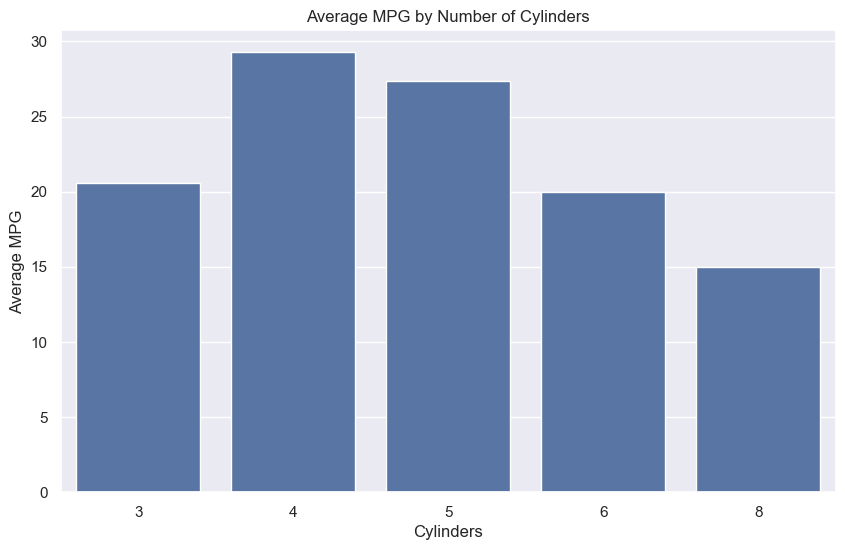

In [308]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_cylinder_mpg, x='cylinders', y='mpg')
plt.title("Average MPG by Number of Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Average MPG")
plt.show()

*This is the average MPG different cylinders have on all car types.*

In [318]:
cylinder_mpg = mpg.groupby('cylinders').agg(
    max_mpg=('mpg','max'),
    min_mpg=('mpg','min')
).reset_index()

In [320]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

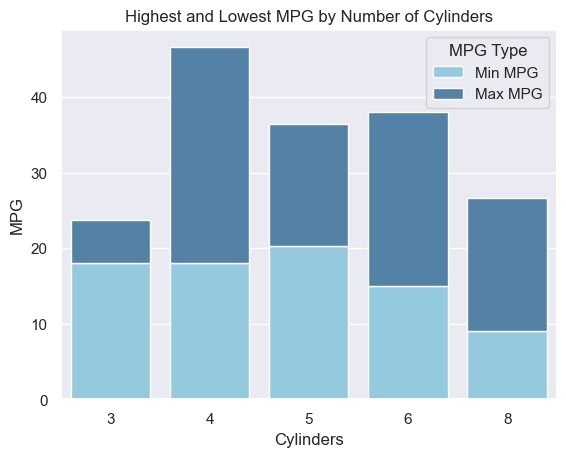

In [328]:
sns.barplot(data=cylinder_mpg, x='cylinders',y='min_mpg', color='skyblue', label='Min MPG')
sns.barplot(data=cylinder_mpg, x='cylinders',y=cylinder_mpg['max_mpg'] - cylinder_mpg['min_mpg'], bottom=cylinder_mpg['min_mpg'],
            color='steelblue', label='Max MPG')
plt.title("Highest and Lowest MPG by Number of Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.legend(title="MPG Type")
plt.show()

*This chart shows the highest and lowest MPG each cylider size has had for their car's fuel economy.*